In [13]:
import duckdb
import pandas as pd
from statsbombpy import sb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [14]:
con = duckdb.connect("example.db")


In [15]:
passes = con.execute("SELECT * FROM passes").df()


In [16]:
for i in passes.columns:
    print(i)

match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_deflection
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_no_touch
dribble_nutmeg
dribble_outcome
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_type
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_deflected
pass_end_location
pass_goal_assist
pass_height
pass_inswinging
pass_length
pass_miscommunication
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player

In [98]:
passes[["play_pattern",
"player",
"player_id",
"position",    "pass_recipient",
    "pass_recipient_position",]]


KeyError: "['pass_recipient_position'] not in index"

In [17]:

columnsp = [
    "match_id",
    "player",
    "position",
    "competition",
    "home_team",
    "away_team",
    "referee",
    "team",
    "minute",
    "timestamp",
    "x",
    "y",
    "pass_end_x",
    "pass_end_y",
    "pass_length",
    "pass_recipient",
    "pass_recipient_id",
    "player_shotFromPass",
    "shot_type_shotFromPass",
    "shot_outcome_shotFromPass",
    "shot_statsbomb_xg_shotFromPass",
    "pass_succes",
    "f3rd_pass",
    "pass_progression",
    "shot_assisted_pass",
    "goal_assisted_pass",
    "cross_pass",
    "box_pass",
    "rowID",
    "related_events"
]

pdf=passes[columnsp]



In [18]:
pdf["match_id"]

0         3825848
1         3825848
2         3825848
3         3825848
4         3825848
           ...   
364735     266557
364736     266557
364737     266557
364738     266557
364739     266557
Name: match_id, Length: 364740, dtype: int64

In [19]:
pdf[(pdf["match_id"]==3825848 )&(pdf["minute"]>90)][["minute","timestamp","team","player","positions","pass_recipient","pass_recipient_id","pass_succes" ,"rowID","related_events","player_shotFromPass","shot_outcome_shotFromPass","goal_assisted_pass"]].head(20)

,minute,timestamp,team,player,pass_recipient,pass_recipient_id,pass_succes,rowID,related_events,player_shotFromPass,shot_outcome_shotFromPass,goal_assisted_pass
894,91,00:46:42.021,Eibar,Asier Riesgo Unamuno,Sergio Enrich Ametller,6700.0,True,aaa31743-38d5-46eb-a4a2-a2f79ba09995,NaN,None,None,False
895,91,00:46:45.173,Eibar,Sergio Enrich Ametller,Ander Capa Rodríguez,6699.0,True,fd3e222b-8ed6-4355-8c90-4636f303b782,NaN,None,None,False
896,91,00:46:53.003,Eibar,Ander Capa Rodríguez,Gonzalo Escalante,6712.0,True,3c599a4b-2f18-4366-bb04-cfbfec296f62,[36699d20-458b-4c0f-a243-401257417a87],None,None,False
897,91,00:46:53.788,Eibar,Gonzalo Escalante,Sergio Enrich Ametller,6700.0,True,461b5fd5-bea6-4617-832a-c12835a4ffca,NaN,None,None,False
898,91,00:46:54.714,Eibar,Sergio Enrich Ametller,None,NaN,False,ed3e04f4-b7e2-4746-a5fe-6cf27eae2692,[5b327766-52be-4bbe-9e0a-e27759731377],None,None,False
899,92,00:47:15.069,Eibar,Borja Ekiza Imaz,Saúl Berjón Pérez,24070.0,False,c5bd5b6b-cb3b-4599-a011-6badc8dfcc22,[39fef99d-72c8-4f2a-9521-bce50c1a3274],None,None,False
900,92,00:47:24.415,Levante UD,Zouhair Feddal,None,NaN,False,316859a8-a716-4222-af07-82c5df48f672,[79fc04df-174c-4970-abb3-d5f05b5d704d],None,None,False
901,92,00:47:27.573,Eibar,Mauro Javier Dos Santos,Daniel García Carrillo,6775.0,True,79fc04df-174c-4970-abb3-d5f05b5d704d,"[316859a8-a716-4222-af07-82c5df48f672, 66aa421...",None,None,False
902,92,00:47:29.631,Eibar,Daniel García Carrillo,None,NaN,False,d47a86d8-5e35-4405-868c-65d737cc4615,[6151038e-857c-473c-9d2b-f3acd3314d0b],None,None,False
903,92,00:47:30.642,Levante UD,José María Martín-Bejarano Serrano,Víctor Casadesús Castaño,23791.0,True,6151038e-857c-473c-9d2b-f3acd3314d0b,"[9b5b48ea-2048-4887-9c5e-e83d42932581, d47a86d...",None,None,False


In [44]:
import pandas as pd

# Filtreleme ve sıralama
df_network = pdf[pdf["match_id"] == 3825848].copy()  # Create a copy to avoid SettingWithCopyWarning
# df = df.sort_values(by='timestamp').reset_index(drop=True)
df_network['timestamp'] = pd.to_datetime(df_network['timestamp'])

# Sekans ID ve türleri için listeler
sequence_id = []
in_sequence_id = []
sequence_type = []  # Sekans türleri: 'Goal', 'Shot', 'NoShot'
current_sequence_id = 0
current_in_sequence_id = 0
previous_player_to = None  # Bir önceki pası alan oyuncu

for i, row in df_network.iterrows():
    # Yeni bir sekans başlatma kriterleri
    if (row['player'] != previous_player_to) :
        # Eğer önceki satırda şut sonucu varsa sekans türünü belirle
        if i > 0:
            previous_row = df_network.iloc[i - 1]
            if previous_row.get('shot_outcome_shotFromPass') == 'Goal':
                sequence_type[-1] = 'Goal'
            elif previous_row['player_shotFromPass'] is not None:
                sequence_type[-1] = 'Shot'
            else:
                sequence_type[-1] = 'NoShot'

        # Yeni bir sekans başlat
        current_sequence_id += 1
        current_in_sequence_id = 0

    current_in_sequence_id+=1
    # Sekans ID'sini ve geçici türü kaydet
    sequence_id.append(current_sequence_id)
    in_sequence_id.append(current_in_sequence_id)
    sequence_type.append('')  # Tür daha sonra doldurulacak

    # Bir sonraki kontrol için 'pass_recipient' değerini güncelle
    previous_player_to = row['pass_recipient']

# Son sekansı kontrol et
last_row = df_network.iloc[-1]
if last_row.get('shot_outcome_shotFromPass') == 'goal':
    sequence_type[-1] = 'Goal'
elif last_row['player_shotFromPass'] is not None:
    sequence_type[-1] = 'Shot'
else:
    sequence_type[-1] = 'NoShot'

# Sekans türlerini tüm satırlara yayma
df_network['SequenceID'] = sequence_id
df_network['InSequenceID'] = in_sequence_id
df_network['SequenceType'] = sequence_type
df_network['SequenceType'] = df_network.groupby('SequenceID')['SequenceType'].transform('last')
df_network['time_past'] = df_network.groupby('SequenceID')['timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds())



# İlgili sütunları gösterme
result = df_network[["minute", "timestamp", "player", "pass_recipient", "pass_succes",
             "rowID", "related_events", "player_shotFromPass", "SequenceID","InSequenceID","time_past", "SequenceType"]].tail(20)

result

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_4353/503992040.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_network['timestamp'] = pd.to_datetime(df_network['timestamp'])


,minute,timestamp,player,pass_recipient,pass_succes,rowID,related_events,player_shotFromPass,SequenceID,InSequenceID,time_past,SequenceType
888,90,2025-01-03 00:45:01.330,Daniel García Carrillo,Saúl Berjón Pérez,False,280e7e2c-3dde-4041-bef1-2cdcfc60c8a0,NaN,None,339,1,0.000,NoShot
889,90,2025-01-03 00:45:20.512,Zouhair Feddal,Nabil Ghilas,True,d8916176-6b98-4abd-bf7c-a5be22841322,NaN,None,340,1,0.000,NoShot
890,90,2025-01-03 00:45:24.064,Nabil Ghilas,Deyverson Brum Silva Acosta,False,c57c56b4-a2e9-4818-be5c-79ffea0b25ce,"[acfc6b47-4b75-4df6-94e0-8f02d7125d25, b110f97...",None,340,2,3.552,NoShot
891,90,2025-01-03 00:45:30.168,Borja Ekiza Imaz,Gonzalo Escalante,True,c3034933-9e1f-46fc-b980-1d60b179997a,[52ca90d3-ac1d-4a7c-bf71-7b1e83147913],None,341,1,0.000,NoShot
892,90,2025-01-03 00:45:31.594,Gonzalo Escalante,Saúl Berjón Pérez,False,bc2ab27f-c1f4-42b4-b61f-07b9de4fcad3,NaN,None,341,2,1.426,NoShot
893,90,2025-01-03 00:45:51.816,Rubén Iván Martínez Andrade,Deyverson Brum Silva Acosta,False,b64cd4c8-6cf2-4329-bccc-0eeaecb97b5a,NaN,None,342,1,0.000,NoShot
894,91,2025-01-03 00:46:42.021,Asier Riesgo Unamuno,Sergio Enrich Ametller,True,aaa31743-38d5-46eb-a4a2-a2f79ba09995,NaN,None,343,1,0.000,NoShot
895,91,2025-01-03 00:46:45.173,Sergio Enrich Ametller,Ander Capa Rodríguez,True,fd3e222b-8ed6-4355-8c90-4636f303b782,NaN,None,343,2,3.152,NoShot
896,91,2025-01-03 00:46:53.003,Ander Capa Rodríguez,Gonzalo Escalante,True,3c599a4b-2f18-4366-bb04-cfbfec296f62,[36699d20-458b-4c0f-a243-401257417a87],None,343,3,10.982,NoShot
897,91,2025-01-03 00:46:53.788,Gonzalo Escalante,Sergio Enrich Ametller,True,461b5fd5-bea6-4617-832a-c12835a4ffca,NaN,None,343,4,11.767,NoShot


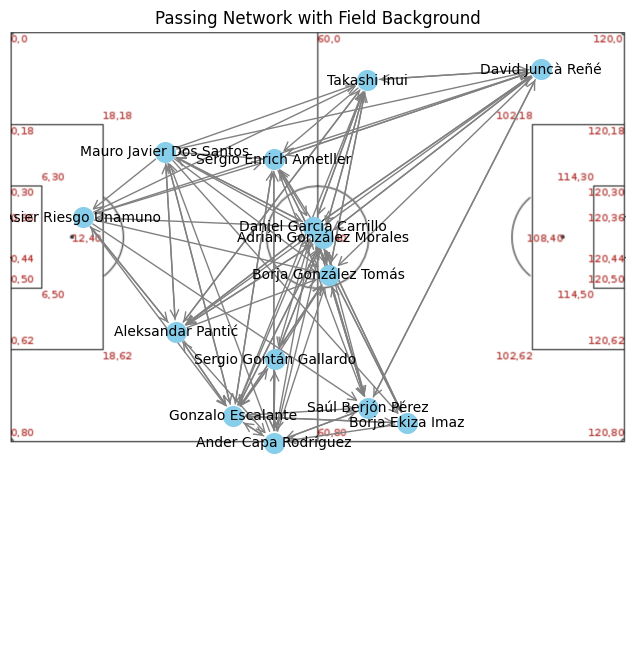

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



df = df_network[df_network["team"]=="Eibar"]

# Sadece başarılı pasları ve geçerli 'pass_recipient' olan satırları kullan
df = df[(df['pass_succes']) & (df['pass_recipient'].notna())]

# NetworkX grafiği oluştur
G = nx.DiGraph()  # Yönlü grafik
for _, row in df.iterrows():
    G.add_edge(row['player'], row['pass_recipient'], weight=1)

# Ağırlıkları kenar kalınlığına dönüştür
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Oyuncu konumları
positions = {}
for _, row in df.iterrows():
    # Oyuncu konumlarını ekle
    if row['player'] not in positions:
        positions[row['player']] = (row['x'], row['y'])
    if row['pass_recipient'] not in positions:
        positions[row['pass_recipient']] = (row['pass_end_x'], row['pass_end_y'])

# Görselleştirme
fig, ax = plt.subplots(figsize=(10, 8))
  
# Arka plan görseli ekleme
field_image = plt.imread("pitch.png")  # Futbol sahası görselinin yolu
ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Koordinatları ayarla

# Ağ çizimi
nx.draw_networkx_nodes(G, positions, node_size=200, node_color="skyblue", ax=ax)
nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15, ax=ax)

# Eksen ayarları
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
ax.set_axis_off()  # Eksenleri gizle
ax.invert_yaxis()

plt.title("Passing Network with Field Background")
plt.show()

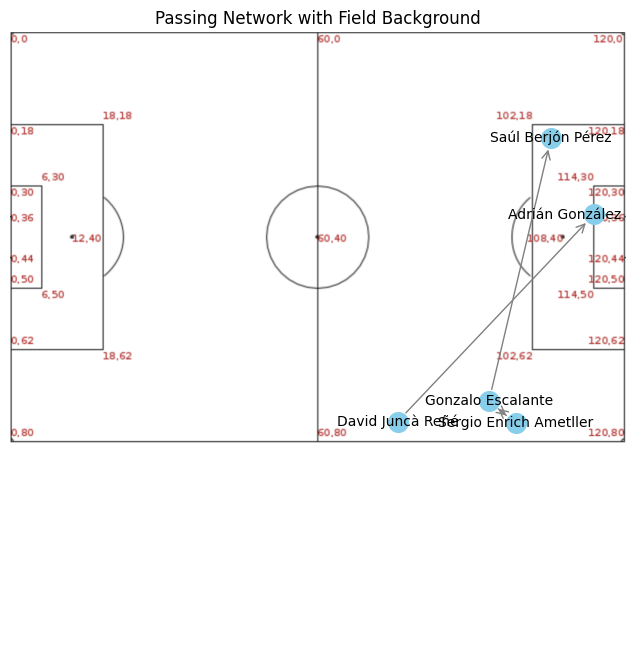

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



df = df_network[(df_network["SequenceType"]=="Shot") & (df_network["team"]=="Eibar") ]

# Sadece başarılı pasları ve geçerli 'pass_recipient' olan satırları kullan
df = df[(df['pass_succes']) & (df['pass_recipient'].notna())]

# NetworkX grafiği oluştur
G = nx.DiGraph()  # Yönlü grafik
for _, row in df.iterrows():
    G.add_edge(row['player'], row['pass_recipient'], weight=1)

# Ağırlıkları kenar kalınlığına dönüştür
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Oyuncu konumları
positions = {}
for _, row in df.iterrows():
    # Oyuncu konumlarını ekle
    if row['player'] not in positions:
        positions[row['player']] = (row['x'], row['y'])
    if row['pass_recipient'] not in positions:
        positions[row['pass_recipient']] = (row['pass_end_x'], row['pass_end_y'])

# Görselleştirme
fig, ax = plt.subplots(figsize=(10, 8))

# Arka plan görseli ekleme
field_image = plt.imread("pitch.png")  # Futbol sahası görselinin yolu
ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Koordinatları ayarla

# Ağ çizimi
nx.draw_networkx_nodes(G, positions, node_size=200, node_color="skyblue", ax=ax)
nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15, ax=ax)

# Eksen ayarları
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
ax.set_axis_off()  # Eksenleri gizle
ax.invert_yaxis()

plt.title("Passing Network with Field Background")
plt.show()

{'Antonio García Aranda': (20.0, 6.9), 'Zouhair Feddal': (20.3, 30.7), 'Víctor Camarasa Ferrando': (35.6, 39.7), 'Ángel Trujillo Canorea': (50.1, 71.5), 'José María Martín-Bejarano Serrano': (51.3, 28.2), 'Rubén García Santos': (67.8, 16.5), 'José Luis Morales Nogales': (81.0, 72.1), 'Víctor Casadesús Castaño': (67.4, 44.2), 'Deyverson Brum Silva Acosta': (106.2, 37.3)}


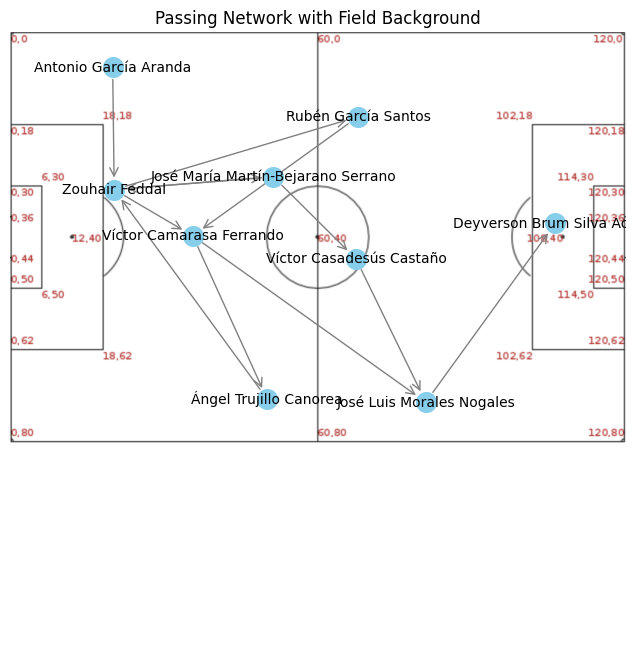

In [77]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



df = df_network[(df_network["SequenceType"] == "Goal") & (df_network["team"] == "Levante UD")]

# Sadece başarılı pasları ve geçerli 'pass_recipient' olan satırları kullan
df = df[(df['pass_succes']) & (df['pass_recipient'].notna())]

# NetworkX grafiği oluştur
G = nx.DiGraph()  # Yönlü grafik
for _, row in df.iterrows():
    G.add_edge(row['player'], row['pass_recipient'], weight=1)

# Ağırlıkları kenar kalınlığına dönüştür
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Oyuncu konumları
positions = {}
for _, row in df.iterrows():
    # Oyuncu konumlarını ekle
    if row['player'] not in positions:
        positions[row['player']] = (row['x'], row['y'])
    if row['pass_recipient'] not in positions:
        positions[row['pass_recipient']] = (row['pass_end_x'], row['pass_end_y'])
print(positions)
# Görselleştirme
fig, ax = plt.subplots(figsize=(10, 8))

# Arka plan görseli ekleme
field_image = plt.imread("pitch.png")  # Futbol sahası görselinin yolu
ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Koordinatları ayarla

# Ağ çizimi
nx.draw_networkx_nodes(G, positions, node_size=200, node_color="skyblue", ax=ax)
nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15, ax=ax)

# Eksen ayarları
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
ax.set_axis_off()  # Eksenleri gizle
ax.invert_yaxis()

plt.title("Passing Network with Field Background")
plt.show()

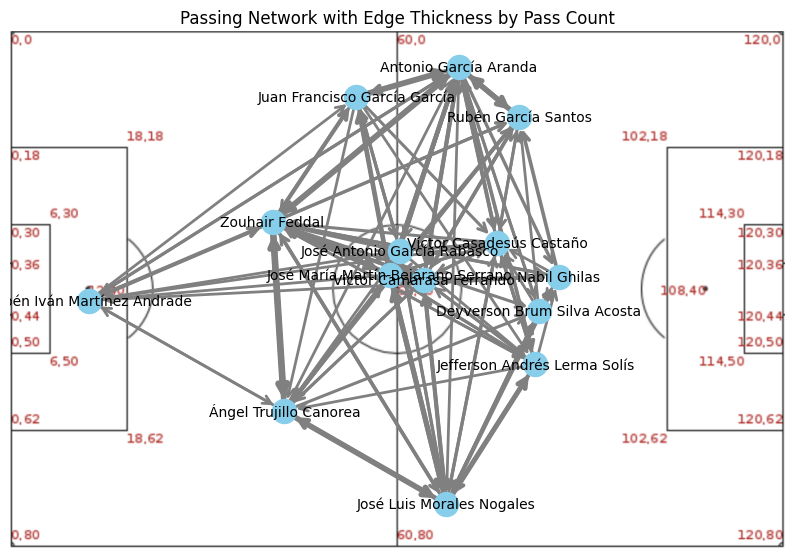

In [84]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Filter and clean the data
df = df_network[(df_network["team"] == "Levante UD")]

# Only keep successful passes with valid recipients
df = df[(df['pass_succes']) & (df['pass_recipient'].notna())]

# Create the NetworkX graph
G = nx.DiGraph()  # Directed graph
for _, row in df.iterrows():
    if G.has_edge(row['player'], row['pass_recipient']):
        G[row['player']][row['pass_recipient']]['weight'] += 0.1  # Increment weight if edge already exists
    else:
        G.add_edge(row['player'], row['pass_recipient'], weight=1)  # Initialize weight as 1

# Get edge weights for visualization (scaled for thickness)
edges = G.edges(data=True)
weights = [2 * edge[2]['weight'] for edge in edges]  # Scale weights (e.g., multiply by 2)

# Compute player positions
pass_positions = df[['player', 'x', 'y']].rename(columns={'x': 'pos_x', 'y': 'pos_y'})
receive_positions = df[['pass_recipient', 'pass_end_x', 'pass_end_y']].rename(
    columns={'pass_recipient': 'player', 'pass_end_x': 'pos_x', 'pass_end_y': 'pos_y'}
)

# Combine pass and receive positions
all_positions = pd.concat([pass_positions, receive_positions], ignore_index=True)

# Calculate average positions
average_positions_df = all_positions.groupby('player')[['pos_x', 'pos_y']].mean()

# Convert to dictionary for NetworkX
average_positions = average_positions_df.apply(lambda row: (row['pos_x'], row['pos_y']), axis=1).to_dict()

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Add background field image
try:
    field_image = plt.imread("pitch.png")  # Path to the football field image
    ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Adjust to field dimensions
except FileNotFoundError:
    print("Field image not found. Please ensure 'pitch.png' is in the correct path.")

# Draw nodes and edges
nx.draw_networkx_nodes(G, average_positions, node_size=300, node_color="skyblue", ax=ax)
nx.draw_networkx_labels(G, average_positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(
    G, average_positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15, ax=ax
)

# Axis settings
ax.set_xlim(0, 120)
ax.set_ylim(0, 80)
ax.set_axis_off()  # Hide axes
ax.invert_yaxis()  # Invert y-axis to match football field orientation

plt.title("Passing Network with Edge Thickness by Pass Count")
plt.show()



In [89]:
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)


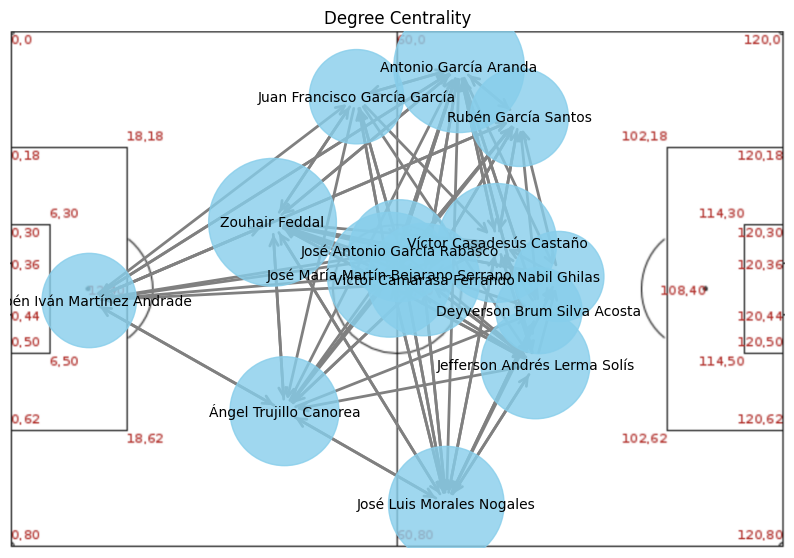

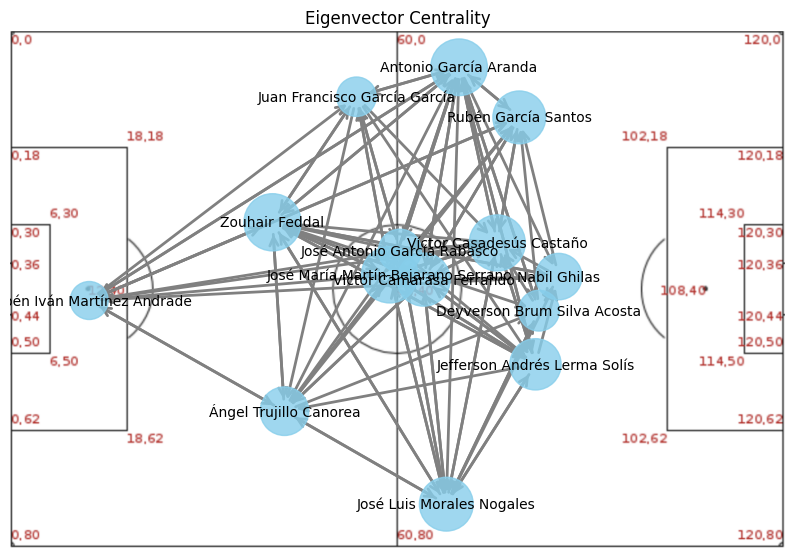

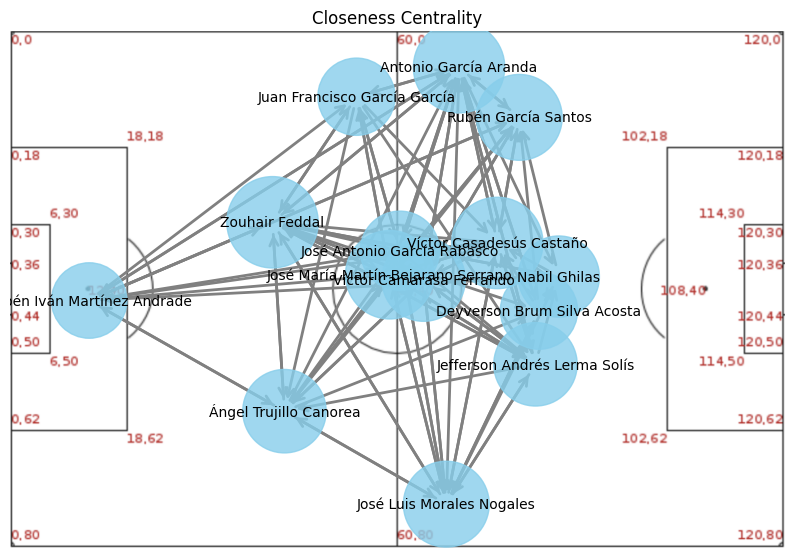

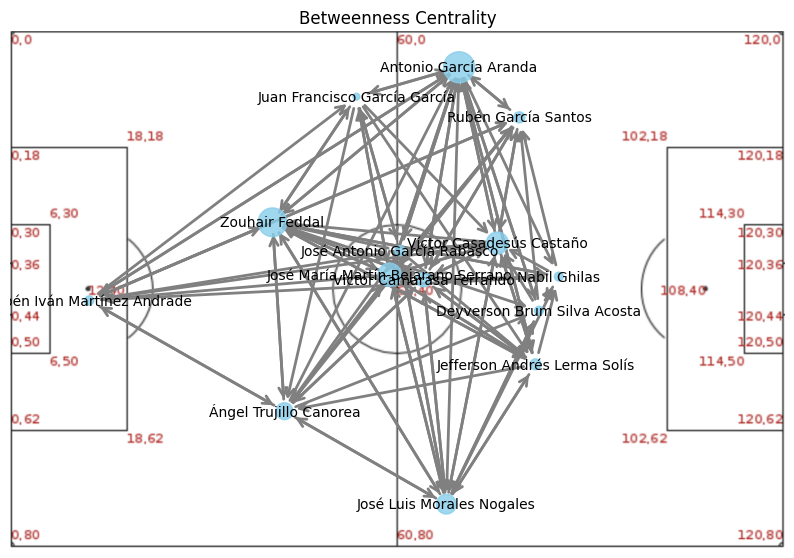

In [92]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming `G` is already created

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Function to draw the graph with centrality values
def draw_centrality_graph(G, centrality, title, positions, field_image_path="pitch.png"):
    # Normalize centrality values for node size
    node_size = [5000 * centrality[node] for node in G.nodes()]
    
    # Visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Add background field image
    try:
        field_image = plt.imread(field_image_path)  # Path to the football field image
        ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Adjust to field dimensions
    except FileNotFoundError:
        print("Field image not found. Please ensure 'pitch.png' is in the correct path.")
    
    # Draw the network
    nx.draw_networkx_nodes(G, positions, node_size=node_size, node_color="skyblue", alpha=0.8, ax=ax)
    nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
    nx.draw_networkx_edges(G, positions, edge_color="gray", width=2, arrowstyle='->', arrowsize=15, ax=ax)
    
    # Axis settings
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_axis_off()
    ax.invert_yaxis()
    
    plt.title(title)
    plt.show()

# Use the function to visualize each centrality measure
draw_centrality_graph(G, degree_centrality, "Degree Centrality", average_positions)
draw_centrality_graph(G, eigenvector_centrality, "Eigenvector Centrality", average_positions)
draw_centrality_graph(G, closeness_centrality, "Closeness Centrality", average_positions)
draw_centrality_graph(G, betweenness_centrality, "Betweenness Centrality", average_positions)


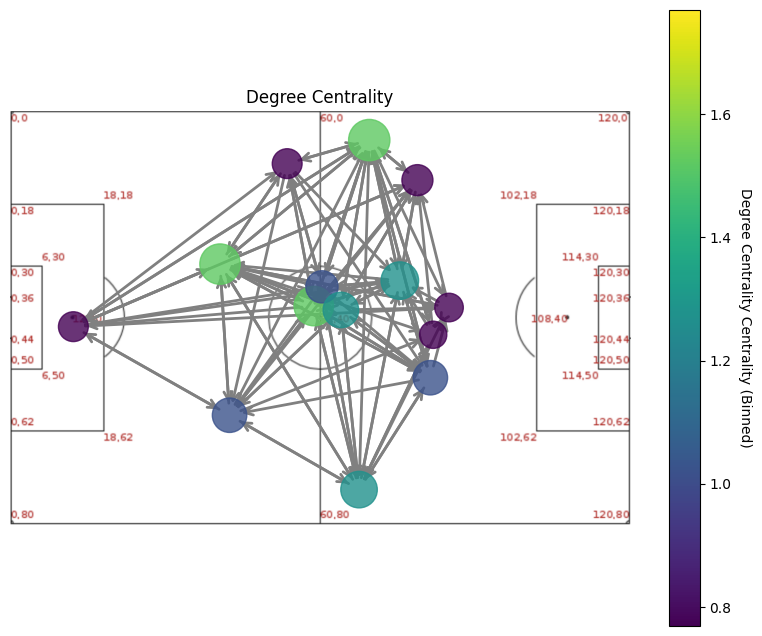

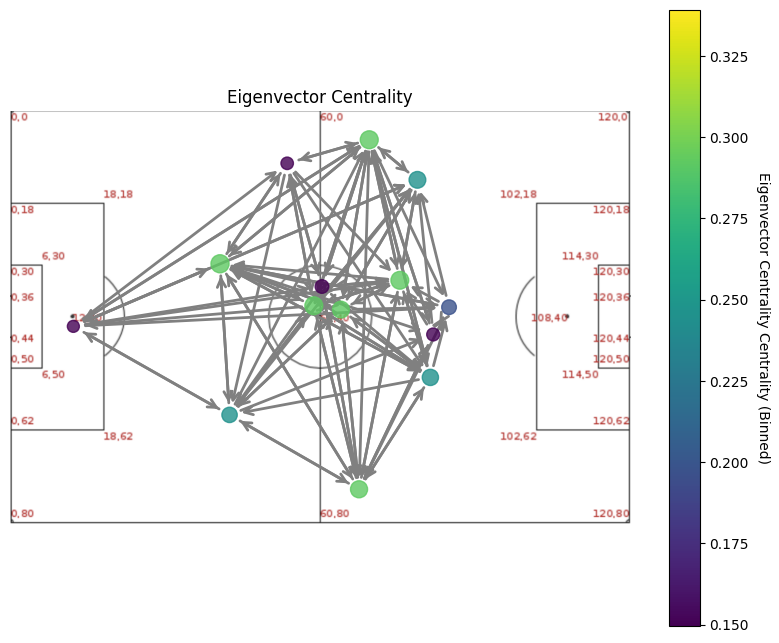

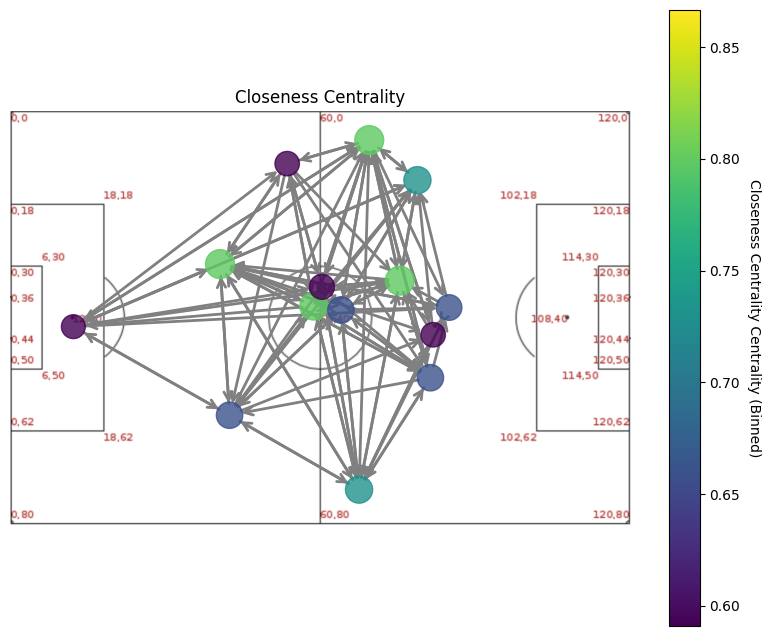

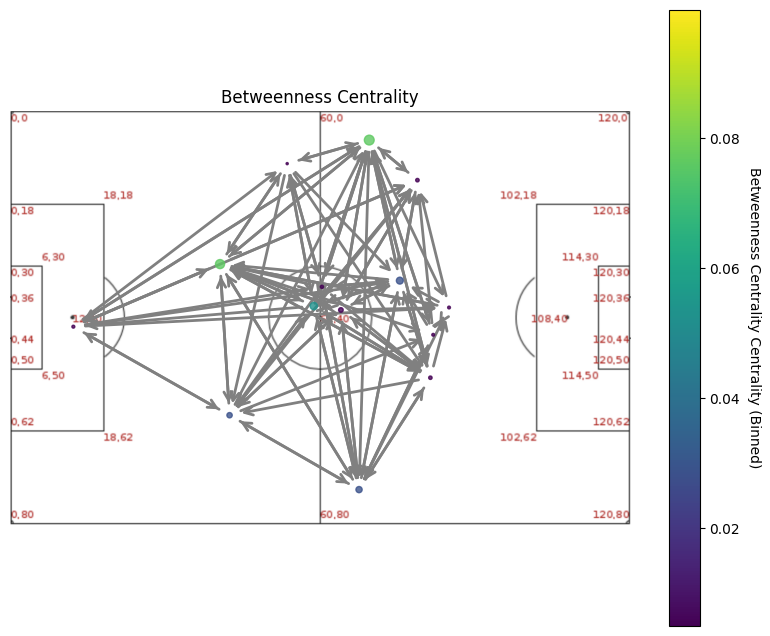

In [94]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming `G` is already created

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Function to create bins and draw graph
def draw_centrality_graph_with_bins(G, centrality, title, positions, field_image_path="pitch.png", bins=4):
    # Convert centrality values to binned categories
    centrality_values = np.array(list(centrality.values()))
    bin_edges = np.linspace(centrality_values.min(), centrality_values.max(), bins + 1)
    binned_values = np.digitize(centrality_values, bin_edges, right=True)

    # Assign colors based on bins
    colors = plt.cm.viridis((binned_values - 1) / bins)  # Normalize to [0, 1]

    # Node sizes
    node_size = [500 * centrality[node] for node in G.nodes()]

    # Visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Add background field image
    try:
        field_image = plt.imread(field_image_path)  # Path to the football field image
        ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Adjust to field dimensions
    except FileNotFoundError:
        print("Field image not found. Please ensure 'pitch.png' is in the correct path.")

    # Draw the network
    nx.draw_networkx_nodes(
        G, positions, node_size=node_size, node_color=colors, alpha=0.8, cmap='viridis', ax=ax
    )
    # Removed player names
    # nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
    nx.draw_networkx_edges(G, positions, edge_color="gray", width=2, arrowstyle='->', arrowsize=15, ax=ax)

    # Axis settings
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_axis_off()
    ax.invert_yaxis()

    # Color bar
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=centrality_values.min(), vmax=centrality_values.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(f'{title} Centrality (Binned)', rotation=270, labelpad=15)

    plt.title(title)
    plt.show()

# Use the function to visualize each centrality measure without player names
draw_centrality_graph_with_bins(G, degree_centrality, "Degree Centrality", average_positions)
draw_centrality_graph_with_bins(G, eigenvector_centrality, "Eigenvector Centrality", average_positions)
draw_centrality_graph_with_bins(G, closeness_centrality, "Closeness Centrality", average_positions)
draw_centrality_graph_with_bins(G, betweenness_centrality, "Betweenness Centrality", average_positions)


In [40]:
df.groupby("player")["InSequenceID"].mean()

player
Antonio García Aranda                 1.000000
José Luis Morales Nogales             3.000000
José María Martín-Bejarano Serrano    3.500000
Rubén García Santos                   8.000000
Víctor Camarasa Ferrando              6.000000
Víctor Casadesús Castaño              2.000000
Zouhair Feddal                        4.666667
Ángel Trujillo Canorea                4.000000
Name: InSequenceID, dtype: float64

In [41]:
df.groupby("player")["time_past"].mean()

player
Antonio García Aranda                  0.000000
José Luis Morales Nogales              6.712000
José María Martín-Bejarano Serrano     7.619500
Rubén García Santos                   22.192000
Víctor Camarasa Ferrando              16.419000
Víctor Casadesús Castaño               3.015000
Zouhair Feddal                        11.221667
Ángel Trujillo Canorea                11.067000
Name: time_past, dtype: float64

In [108]:
con.close()
